[作業目標]

    請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果
    思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
    思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

[作業重點]

    綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/Part01/'

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

相關係數

一樣，pandas 很貼心地讓我們可以非常容易計算相關係數


In [6]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


練習時間

列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息

    最好的方式當然是畫圖，舉例來說，我們知道 EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3 為 x 軸， TARGET 為 y 軸，把資料給畫出來



In [7]:
app_train_corr = app_train.corr()['TARGET']

In [8]:
print(app_train_corr.sort_values(ascending=False))

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187
CNT_FAM_MEMBERS                0.009308
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_21               0.003709


列出目標 (TARGET) 與所有欄位之間相關係數，數值最大15 個

In [9]:
app_train_corr_top = app_train_corr.sort_values(ascending=False)[:15]
app_train_corr_top

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64

列出目標 (TARGET) 與所有欄位之間相關係數，數值最小 15 個

In [10]:
app_train_corr_bottom = app_train_corr.sort_values(ascending=False)[-15:]
app_train_corr_bottom

LIVINGAREA_AVG               -0.032997
FLOORSMIN_MEDI               -0.033394
FLOORSMIN_AVG                -0.033614
ELEVATORS_MEDI               -0.033863
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED_ANOM           -0.045987
DAYS_BIRTH                   -0.078239
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息


-----觀察車齡和年收的關係



In [11]:
app_own_car_age = app_train[app_train['OWN_CAR_AGE'] != 91]#91年的弄掉試試

In [12]:
app_own_car_age['OWN_CAR_AGE'].dropna().sort_values()#排一下

203189     0.0
266899     0.0
122543     0.0
78809      0.0
78826      0.0
266866     0.0
58756      0.0
109600     0.0
115385     0.0
78780      0.0
200369     0.0
153310     0.0
78918      0.0
291534     0.0
222892     0.0
256267     0.0
206672     0.0
222906     0.0
291576     0.0
222874     0.0
153382     0.0
78774      0.0
7325       0.0
195865     0.0
222647     0.0
186292     0.0
266982     0.0
115472     0.0
274151     0.0
58955      0.0
          ... 
271401    65.0
116287    65.0
248395    65.0
263858    65.0
285421    65.0
133295    65.0
124143    65.0
276662    65.0
133286    65.0
258979    65.0
107974    65.0
200189    65.0
206201    65.0
76355     65.0
141258    65.0
235015    65.0
27846     65.0
244651    65.0
45334     65.0
96242     65.0
81323     65.0
285414    65.0
38885     65.0
84173     65.0
211314    65.0
260942    65.0
13505     65.0
273139    65.0
225516    65.0
161390    69.0
Name: OWN_CAR_AGE, Length: 104580, dtype: float64

In [13]:
OWN_CAR_AGE_with_out_nan  = app_train[app_train['OWN_CAR_AGE'] != 91].dropna()#91年的和nan的弄掉 
#app_one_car_age['OWN_CAR_AGE'] 
OWN_CAR_AGE_with_out_nan

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
71,100083,0,0,M,1,1,0,103500.0,573628.5,24435.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,False
124,100145,0,0,F,1,1,1,202500.0,260725.5,16789.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,False
152,100179,0,0,F,1,0,0,202500.0,675000.0,53329.5,...,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0,False
161,100190,0,0,M,1,0,0,162000.0,263686.5,24781.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,False
255,100295,1,0,M,1,0,1,225000.0,1019205.0,31032.0,...,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0,False
296,100341,0,0,M,1,1,0,76500.0,545040.0,20677.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
298,100343,0,0,M,1,1,0,315000.0,90000.0,4504.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
316,100363,0,0,F,1,1,1,360000.0,493497.0,48942.0,...,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,False
323,100371,0,0,F,1,1,1,450000.0,808650.0,31464.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
328,100376,0,0,M,1,1,0,360000.0,254700.0,20250.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False


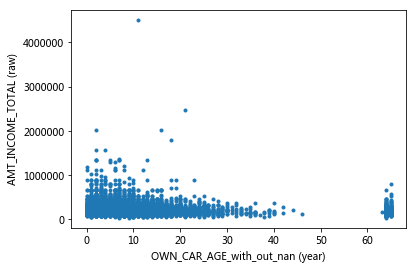

Correlation: -0.1201


In [14]:
#畫圖
plt.plot(OWN_CAR_AGE_with_out_nan['OWN_CAR_AGE'], OWN_CAR_AGE_with_out_nan['AMT_INCOME_TOTAL'], '.')
plt.xlabel('OWN_CAR_AGE_with_out_nan (year)')
plt.ylabel('AMT_INCOME_TOTAL (raw)')
plt.show()
corr = np.corrcoef(OWN_CAR_AGE_with_out_nan['OWN_CAR_AGE'], OWN_CAR_AGE_with_out_nan['AMT_INCOME_TOTAL'])
print("Correlation: %.4f" % (corr[0][1]))

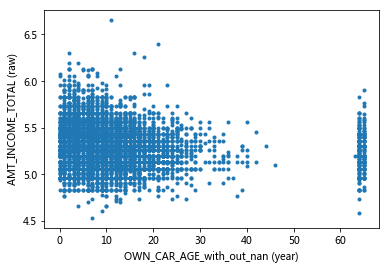

Correlation: -0.1454


In [15]:
# 通常可以對數值範圍較大的取 log: 車齡越久的人，AMT_INCOME_TOTAL 的 variance 越小
#60年以上那群八成是key錯
plt.plot(OWN_CAR_AGE_with_out_nan['OWN_CAR_AGE'], np.log10(OWN_CAR_AGE_with_out_nan['AMT_INCOME_TOTAL']), '.')
plt.xlabel('OWN_CAR_AGE_with_out_nan (year)')
plt.ylabel('AMT_INCOME_TOTAL (raw)')
plt.show()
corr = np.corrcoef(OWN_CAR_AGE_with_out_nan['OWN_CAR_AGE'], np.log10(OWN_CAR_AGE_with_out_nan['AMT_INCOME_TOTAL']))
print("Correlation: %.4f" % (corr[0][1]))

最好的方式當然是畫圖，舉例來說，我們知道 EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，
那我們可以 EXT_SOURCE_3 為 x 軸， TARGET 為 y 軸，把資料給畫出來

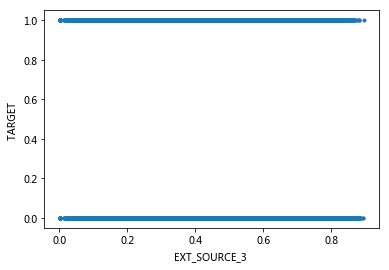

Correlation: nan


In [16]:
plt.plot(app_train['EXT_SOURCE_3'], app_train['TARGET'], '.')
plt.xlabel('EXT_SOURCE_3 ')
plt.ylabel('TARGET ')
plt.show()
corr = np.corrcoef(app_train['EXT_SOURCE_3'], app_train['TARGET'])
print("Correlation: %.4f" % (corr[0][1]))

In [ ]:
#畫盒鬚圖

In [19]:
app_grouped = app_train[['EXT_SOURCE_3', 'TARGET']].groupby('TARGET')

In [21]:
app_grouped.groups

{0: Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                  9,     10,
             ...
             307500, 307501, 307502, 307503, 307504, 307505, 307506, 307507,
             307508, 307510],
            dtype='int64', length=282686),
 1: Int64Index([     0,     26,     40,     42,     81,     94,    110,    138,
                154,    163,
             ...
             307407, 307410, 307433, 307438, 307446, 307448, 307475, 307481,
             307489, 307509],
            dtype='int64', length=24825)}

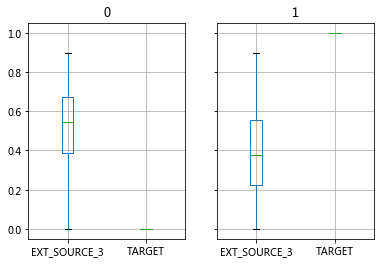

In [22]:
app_grouped.boxplot()
plt.show()